# Music Generation using Algo Approch
I utilized a modified version of the 16x16 tone matrix concept to generate music. Specifically, I processed an image and used it as a switch to activate specific elements in the tone matrix.

In [ ]:
import cv2
import numpy as np
import music21 as m21
import matplotlib.pyplot as plt

In [5]:
# Load the image
img = cv2.imread('/workspaces/Music-Generation-Using-Algorithmic-Approch/Warren-Buffett-On-Rules.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# for working with different color scale, split image into b, g, r separately
b, r, g = cv2.split(img)

Column 0: [21 22 22 23 24 24 25 26 26 27 28 28 27 12 12 13] and maxindex: [10, 11]
Column 1: [ 20  20  21  22 147 155 149 141  27  26  26  27  20  11  12  12] and maxindex: [5]
Column 2: [ 18  19  20 143 134 146 114 141 123 124 117 162  13  12  12  13] and maxindex: [11]
Column 3: [ 17  18  18 158 139 118 121 145 126 106 115 125 162 162 152  11] and maxindex: [12, 13]
Column 4: [ 16  16 153 128 137 125 104 128 131 104 116 118 161  31 158  43] and maxindex: [12]
Column 5: [ 14  15  15 130 132  72 116 146  53  94 104  44 105  26  23  14] and maxindex: [7]
Column 6: [ 13  13  14  15  16 112  96 123  91  87 106  20  21  63  39   9] and maxindex: [7]
Column 7: [11 12 12 13 14 15 10 16 17 17 18 18 19  8  8  8] and maxindex: [12]
Column 8: [10 10 11 12 12 13 14 14 15 16 16 17 18 47  8  8] and maxindex: [13]
Column 9: [ 8  9 10 10 11 12 12 13 14 14 15 16 16 17  8  8] and maxindex: [13]
Column 10: [  7   8   8   9  10  10  17  12  12  12 251  14  15  16  16  17] and maxindex: [10]
Column 11: [ 

In [ ]:
def get_intensity_columwise(img, seq_len=16):
    '''
    Get the intensity values of the resized image
    Args:
        img: image -> 2d array with only one color scale
        seq_len: int -> 16xN, N determine length of music that is generated
    Return:
        column_index: list -> list of maximum index of array column-wise
    '''
    # Resize the image to 16x16 pixels
    resized_img = cv2.resize(img, (16, 16))
    intensity_values = resized_img.flatten()

    # Transpose the intensity values to get the values column-wise
    intensity_values_column_wise = [intensity_values[i::seq_len] for i in range(seq_len)]

    column_index = []
    
    # Print the index of the intensity values column-wise
    for i, col in enumerate(intensity_values_column_wise):
        indices = np.where(col == col.max())[0].tolist()
        column_index.append(indices)
        print(f'Column {i}: {col} and maxindex: {indices}')

In [ ]:
plt.figure(figsize=(16,16))
for index in range(3):
    plt.subplot(1, 3, index+1)
    plt.imshow(resized_img, cmap='gray')
    plt.show()

In [ ]:
# for i, index_col in enumerate(column_index):
#   print(index_col[-1])

# Tone matrix Configuration
The Tone matrix is a 2D matrix where the horizontal axis represents time and the vertical axis represents frequency. As we move from bottom to top on the vertical axis, the frequency increases. Similarly, as we move from left to right on the horizontal axis, time increases. The matrix consists of 16 fixed notes, where each note is assigned a unique row ranging from the lower frequency note C3 to the upper frequency note C6.

In [6]:
# make 16x16 tone matrix
switch = np.zeros((16, 16), dtype='object')
notes = ['C6', 'A5', 'G5', 'F5', 'D5', 'C5', 'A4', 'G4',
        'F4', 'D4', 'C4', 'A3', 'G3', 'F3', 'D3', 'C3']
for i in range(16):
  switch[i, :] = notes[i]
# print(switch)

## Only one switched is allowed in a time.
If there are more switches that are to be opened in column-wise, then switch with least frequency is played.

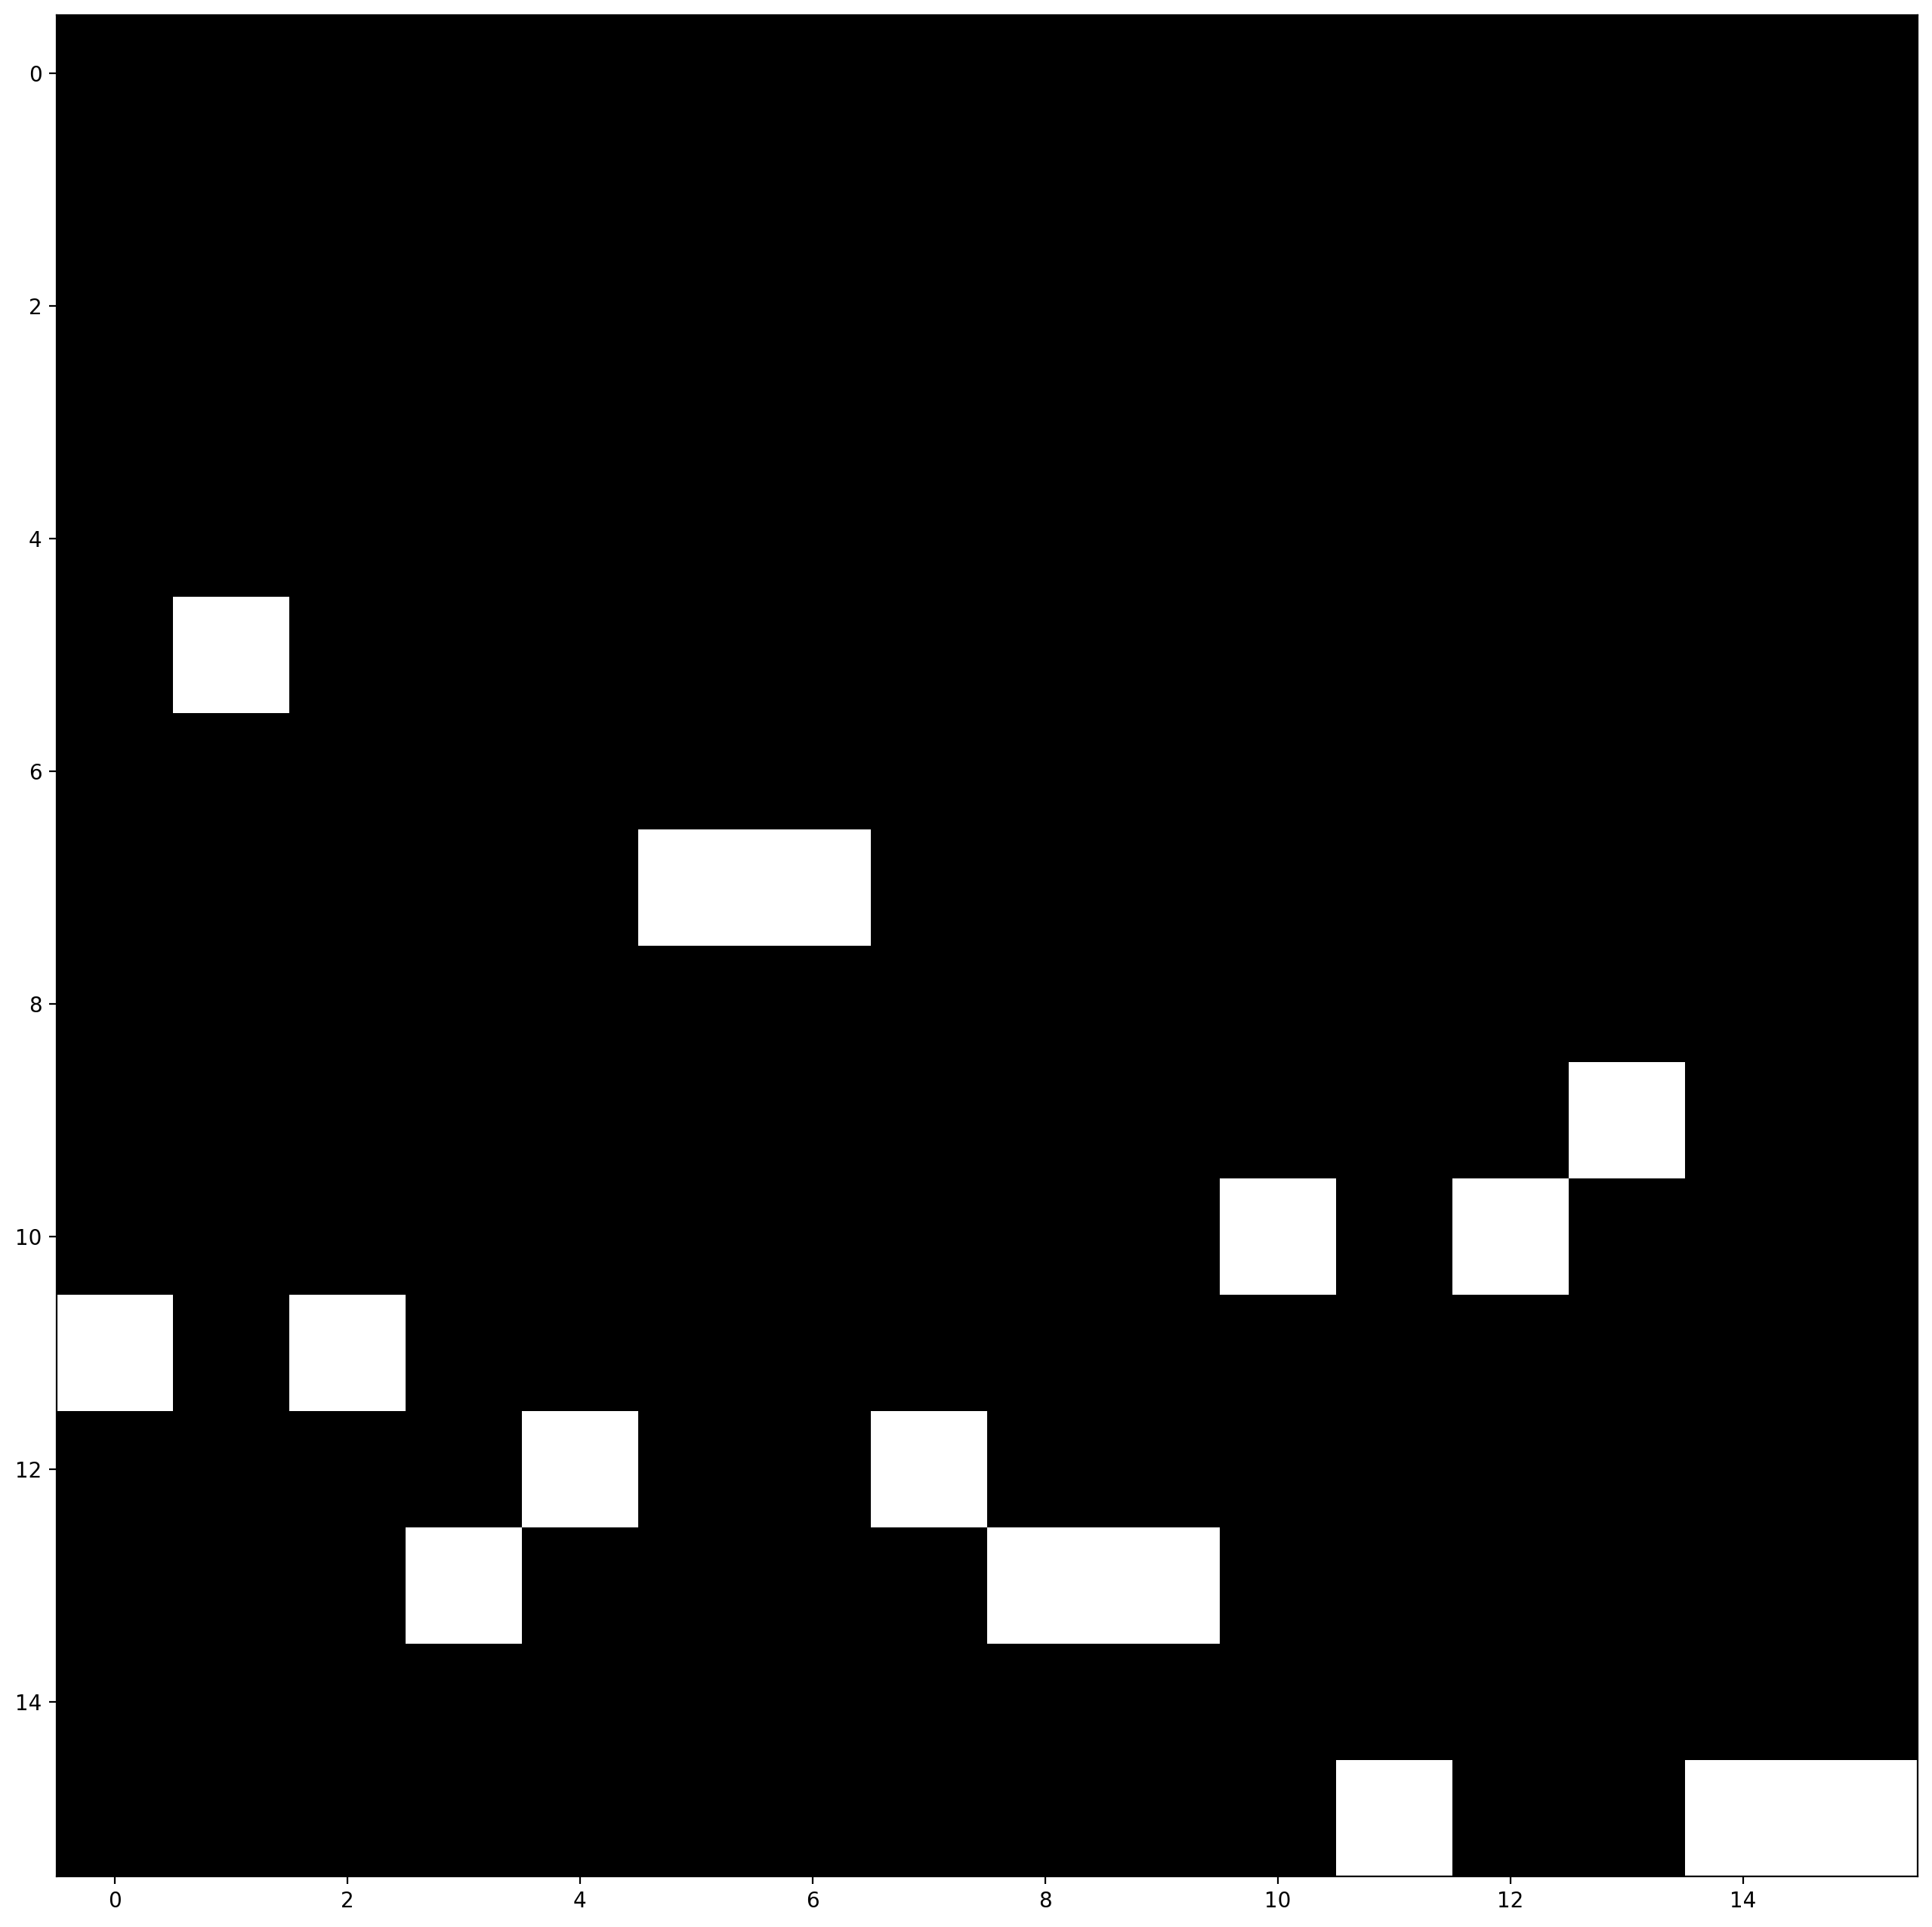

In [7]:
bw_image = np.zeros((16, 16), dtype='uint8')
for i, index_col in enumerate(column_index):
  if len(index_col) == 1:
    col = index_col[-1]
    bw_image[i][col] = 255

bw_image = bw_image.T
plt.figure(figsize=(16,16))
plt.imshow(bw_image, cmap='gray')
plt.show()

In [9]:
# generating midi file
stream_algo = m21.stream.Stream()
offset = 0
for y in range(16):
    add = ''
    for x in range(16):
        if (bw_image[x][y] != 0):
            temp = switch[x][y]
            add = add+' '+temp
    if (add):
        # d = m21.duration.Duration(4.0)
        stream_algo.insertIntoNoteOrChord(offset, m21.chord.Chord(add))
        offset += 0.5


### Save in midi format

In [10]:
stream_algo.show('text')
stream_algo.write('midi', 'algo_one_note_q.mid')

{0.0} <music21.chord.Chord A3>
{0.5} <music21.chord.Chord C5>
{1.0} <music21.chord.Chord A3>
{1.5} <music21.chord.Chord F3>
{2.0} <music21.chord.Chord G3>
{2.5} <music21.chord.Chord G4>
{3.0} <music21.chord.Chord G4>
{3.5} <music21.chord.Chord G3>
{4.0} <music21.chord.Chord F3>
{4.5} <music21.chord.Chord F3>
{5.0} <music21.chord.Chord C4>
{5.5} <music21.chord.Chord C3>
{6.0} <music21.chord.Chord C4>
{6.5} <music21.chord.Chord D4>
{7.0} <music21.chord.Chord C3>
{7.5} <music21.chord.Chord C3>


'algo_one_note_q.mid'

In [12]:
stream_algo.show('midi')

# second bw_image


In [ ]:
bw_image = np.zeros((16, 16), dtype='uint8')
for i, index_col in enumerate(column_index):
  # print(index_col)
  if len(index_col) == 1:
    col = index_col[0]
    bw_image[i][col] = 255
  elif len(index_col) == 2:
    print(index_col)
    col = index_col[0]
    col2 = index_col[1]
    bw_image[i][col] = 255
    bw_image[i][col2] = 255
  elif len(index_col) > 2:
    rand_index = sorted(np.random.randint(0, len(index_col), size=2))
    print(rand_index)
    if i % 2 == 0:
        col1 = index_col[-1]
    else: 
        col1 = index_col[-2]
    col2 = rand_index[-1]
    col3 = rand_index[-2]
    bw_image[i][col1] = 255
    bw_image[i][col2] = 255
    # bw_image[i][col3] = 255


bw_image = bw_image.T.tolist()
print(bw_image)
plt.figure(figsize=(16,16))
plt.imshow(bw_image, cmap='gray')
plt.show()

In [ ]:
# generating midi file
stream_algo = m21.stream.Stream()
instrument = m21.instrument.fromString('Violin')
stream_algo.insert(0.0, instrument)
offset = 0
for y in range(16):
    add = ''
    for x in range(16):
        if (bw_image[x][y] == 255):
            temp = switch[x][y]
            add = add+' '+temp
    # if (add):
    stream_algo.insertIntoNoteOrChord(offset, m21.chord.Chord(add))
    if (len(add.split()) == 1):
        offset += 0.5
        print('single',offset)
    else: 
        offset += 1

In [ ]:
stream_algo.show('text')
stream_algo.write('midi', 'algo_2s.midi')